<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/%EC%9E%90%EB%8F%99%EC%B0%A8%EB%B2%88%ED%98%B8%ED%8C%90_%EC%9D%B8%EC%8B%9D3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [ ]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 221 (delta 56), reused 68 (delta 39), pack-reused 119
Receiving objects: 100% (221/221), 21.22 MiB | 31.63 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights

--2022-06-23 02:41:16--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  45.0MB/s    in 5.7s    

2022-06-23 02:41:22 (41.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
weight_file= 'yolov3.weights'
cfg_file = '/content/SkillTreePython-DeepLearning/data/yolov3.cfg'
name_file = '/content/SkillTreePython-DeepLearning/data/coco.names'


In [ ]:
model=cv2.dnn.readNet(weight_file, cfg_file)

error: ignored

In [ ]:
name_file = '/content/SkillTreePython-DeepLearning/00.추가학습/data/coco.names'
with open(name_file, 'r') as f:
  class_names = []
  for line in f.readlines():
    #print(line.strip())
    class_names.append(line.strip()) # line.strip() : /n 제거
print(len(class_names), class_names)

80 ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
number_cascade_name = '/content/SkillTreePython-DeepLearning/00.추가학습/data/haarcascade_russian_plate_number.xml'
number_model=cv2.CascadeClassifier()
number_model.load(cv2.samples.findFile(number_cascade_name))

True

In [ ]:
mn, mx=0,255
size=(len(class_names),3)
colors=np.random.uniform(mn, mx, size=size)
print(colors.shape)

(80, 3)


In [ ]:
colors[3]

array([242.46148163,  17.82586436, 168.9114353 ])

In [ ]:
f_path='/content/car.jpg'
img=cv2.imread(f_path)
img_h,img_w, img_c=img.shape
print(img_h, img_w, img_c)
cv2_imshow(img)

AttributeError: ignored

In [ ]:
layer_indexes=model.getUnconnectedOutLayers()
for idx in layer_indexes:
  print(idx[0])
layer_names=model.getLayerNames()
print(len(layer_names), layer_names)
print(f'첫번째 prediction 레이어: {layer_names[layer_indexes[0][0]-1]}')
print(f'두번째 prediction 레이어: {layer_names[layer_indexes[1][0]-1]}')
print(f'세번째 prediction 레이어: {layer_names[layer_indexes[2][0]-1]}')


200
227
254
254 ['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_3

In [ ]:
blob=cv2.dnn.blobFromImage(img, 0.00392,(416,416),(0,0,0),True,crop=False )
model.setInput(blob)

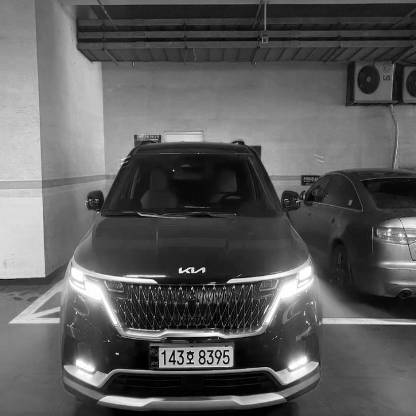

In [ ]:
cv2_imshow(blob[0][0]*255)

In [ ]:
preds=model.forward(['yolo_82','yolo_94','yolo_106'])
for pred in preds:
  print(pred.shape)

(507, 85)
(2028, 85)
(8112, 85)


[[288 526 194  65]]
288 526 194 65


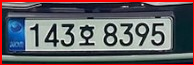

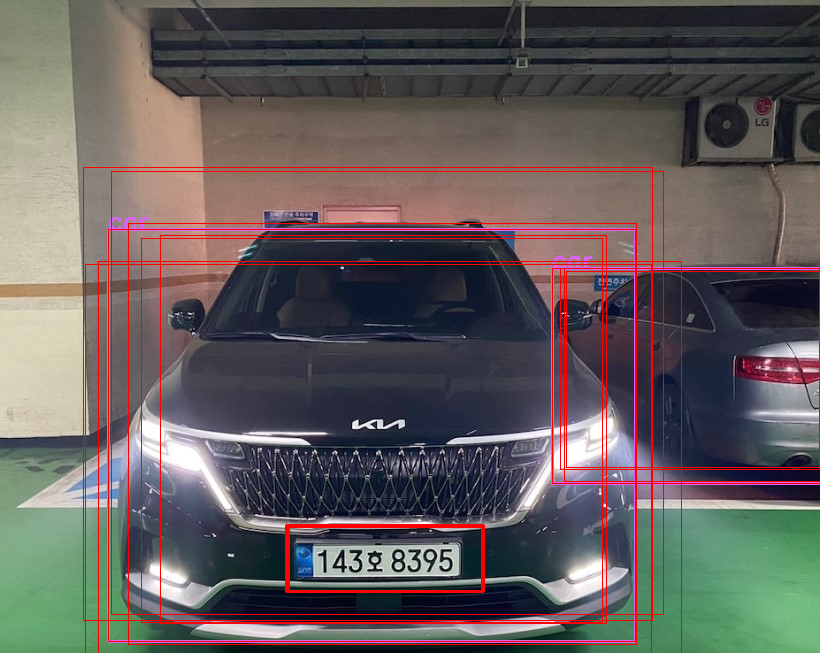

12 12 12


In [ ]:
boxes=[]
confidences=[]
class_ids=[]
for pred in preds:
  for v in pred:
    box=v[:4]
    confidence=v[4]
    class_id=v[5:]
    class_id=np.argmax(class_id)
    if confidence > 0.5:
      x_center, y_center, w, h=box
      x_center, w = int(x_center*img_w), int(w*img_w)
      y_center, h =int(y_center*img_h),int(h*img_h)
      x, y=x_center-int(w/2), y_center-int(h/2)
      cv2.rectangle(img, (x, y),(x+w, y+h),(0,0,255),1)
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
pred2 = number_model.detectMultiScale(img)
print(pred2)
x1, y1, w1, h1 = pred2[0]
print(x1, y1, w1, h1)
cv2.rectangle(img, (x1, y1),(x1+w1, y1+h1),[0,0,255], 2)
# 좌표 부분만 크롭
croped1 = img[y1:y1+h1, x1:x1+w1] # 행:y, 열:x
cv2_imshow(croped1)
cv2_imshow(img)
print(len(boxes),len(confidences),len(class_ids))


3 2 car [241.25428061 101.38555833 216.3831776 ]
7 2 car [241.25428061 101.38555833 216.3831776 ]
[[286 525 197  66]
 [453 616  77  26]]
286 525 197 66


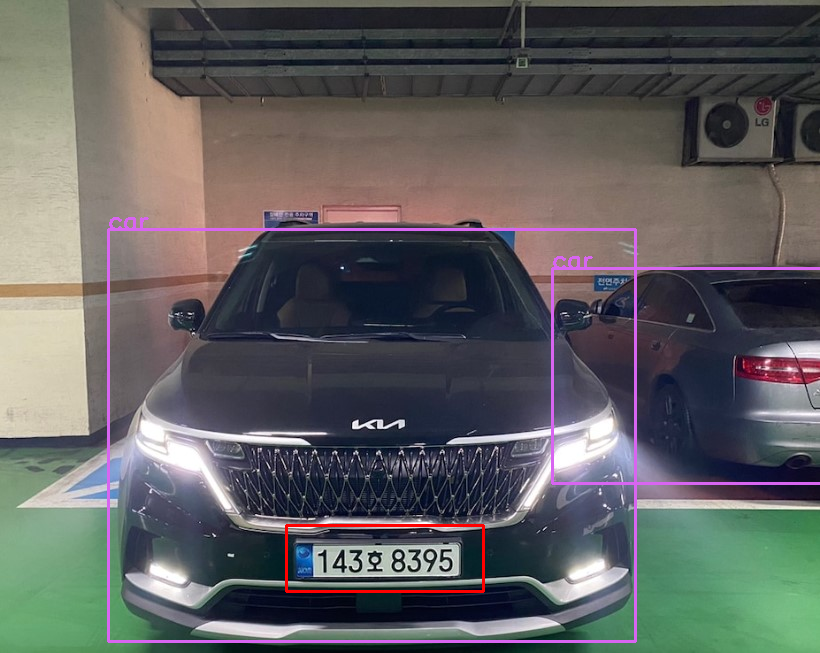

In [ ]:
f_path='/content/car.jpg'
img=cv2.imread(f_path)
selected_box_idx=cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.4)
for bi, (x, y, w, h) in enumerate(boxes):
  if bi in selected_box_idx:
    class_id=class_ids[bi]
    color=colors[class_id]
    class_name=class_names[class_id]
    print(bi, class_id, class_name, color)
    cv2.rectangle(img, (x, y),(x+w, y+h),color, 2)
    cv2.putText(img, class_name, (x, y),cv2.FONT_HERSHEY_SIMPLEX, .8, color, 2 )
pred2 = number_model.detectMultiScale(img)
print(pred2)
x1, y1, w1, h1 = pred2[0]
print(x1, y1, w1, h1)
cv2.rectangle(img, (x1, y1),(x1+w1, y1+h1),[0,0,255], 2)
cv2_imshow(img)



In [ ]:
boxes

[[83, 167, 569, 453],
 [111, 171, 552, 443],
 [560, 268, 259, 201],
 [552, 268, 270, 215],
 [566, 271, 261, 196],
 [564, 268, 264, 213],
 [141, 238, 461, 384],
 [108, 229, 527, 412],
 [160, 235, 446, 388],
 [128, 223, 508, 421],
 [85, 264, 566, 394],
 [98, 261, 583, 401]]

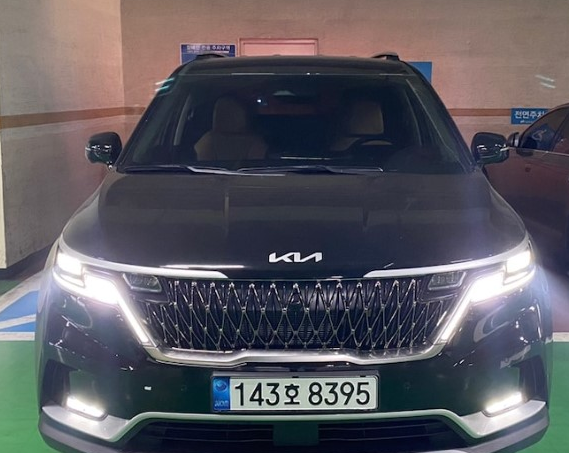

In [ ]:
x, y, w, h=boxes[0]
croped = img[y:y+h, x:x+w] # 행:y, 열:x
cv2_imshow(croped)
# cv2_imshow(img)
# print(len(boxes),len(confidences),len(class_ids))